In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import random
from statsmodels.stats.power import tt_ind_solve_power

def date_converter(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')

Срок выполнения задания: 17 марта 17:00.


### Задание
Вам предстоит разработать дизайн эксперимента по тестированию монетизационных продуктов.
В конечном счёте, в монтизационных продуктах нас всегда интересует увеличение выручки, 
но к сожалению не всегда мы можем зафиксировать изменение именно этой метрики.

#### Кейс
Вы аналитик в продуктовой дискавери команде.
На текущий момент приближается начало нового квартала и вам необходимо спланировать
эксперименты в нём.

У вас есть два продукта:
- один базовый продукт, который предоставляет минимальный набор услуг на вашем ресурсе;
- один продвинутый продукт, который предоставляет расширенный набор услуг.

На текущий момент на квартал у вашей команды есть для проверки две гипотезы:
- Дополнительное информирование об эффективности услуг будет стимулировать их покупку;
- Повышение цены базового продукта должно стимулировать покупку продвинутого продукта


#### Для планирования эксперимента изучите данные и метрики (2 балла):

- Загрузите файл и изучите данные;
- Подумайте над тем, какие метрики можно выделить на основе этих данных: выручка, пользователи, транзакции, средний чек и т.д.
- Постройте графики плотности распределения для этих метрик и сделайте выводы о характере распределений: тип, наличие выбросов, насколько сильный разброс;
- Изучите основные статистики этих метрик: среднее, стандартное отклонение;
- Изучите то, насколько эти статистики подвержены сезональности.


#### Формализуйте гипотезы (4 балла):

- Опишите метрики и статистики, изменение которых вы ожидаете;
- Предположите какое относительное изменение этих статистик в процентах вы ожидаете.

#### Предскажите минимально детектируемый эффект для своих метрик и спланируйте эксперименты внутри квартала (4 балла):

- Принимая в расчёт максимально возможные размеры групп и ограничения по длительности в квартал рассмотрите разные планы проведения тестов и предскажите их чувствительность;
- Определите наиболее оптимальный план экспериментов. Обоснуйте, почему вы его считаете оптимальным.


#### * Оптимизация плана (2 балла):
Предложите варианты ускорения экспериментов — всегда могут образоваться ситуации, когда ваши гипотезы не подтвердились и они требуют изменения или уточнения и необходимости повторных тестов. Цели достигать всегда хорошо в рамках отведённого на них срока. Какие параметры экспериментов вы поменяете? К каким последствиям могут привести такие изменения?

#### Описание данныx

event_date - дата 

user_id - идентификатор пользователя

product - тип продукта

amount - сумма покупок

transactions - количество транзакций

In [2]:
df = pd.read_csv('user_transactions.csv')
df['event_date']=df.event_date.apply(date_converter)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278186 entries, 0 to 1278185
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   event_date    1278186 non-null  datetime64[ns]
 1   user_id       1278186 non-null  int64         
 2   product       1278186 non-null  object        
 3   amount        1278186 non-null  float64       
 4   transactions  1278186 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 48.8+ MB


#### Пропусков в данных нет

In [9]:
df

,event_date,user_id,product,amount,transactions
0,2020-09-29,40746820883461494,basic,95.0,1
1,2020-09-29,41102328408008828,advanced,279.0,1
2,2020-09-29,63464894315144075,basic,64.0,1
3,2020-09-29,111526991873455341,basic,399.0,1
4,2020-09-29,169522572963414231,basic,199.0,1
...,...,...,...,...,...
1278181,2020-12-29,9175681616034416929,advanced,679.0,1
1278182,2020-12-29,9190225485662720178,advanced,439.0,1
1278183,2020-12-29,9192452502210580022,basic,149.0,1
1278184,2020-12-29,9202424686732081420,basic,947.0,3


In [10]:
df[['product', 'amount', 'transactions']].groupby(by='product').describe()

amount                                                     \
             count        mean         std   min    25%    50%    75%   
product                                                                 
advanced  287758.0  499.179714  583.444202  20.0  202.0  369.0  599.0   
basic     990428.0  164.003625  233.032281   8.0   80.0  120.0  199.0   

                   transactions                                                 
               max        count      mean       std  min  25%  50%  75%    max  
product                                                                         
advanced   40653.0     287758.0  1.278383  1.453016  1.0  1.0  1.0  1.0  227.0  
basic     108186.0     990428.0  1.296846  1.527605  1.0  1.0  1.0  1.0  768.0

#### Видим, что есть выбросы и из-за этого большой разброс в данных (дисперсия)

advanced         AxesSubplot(0.1,0.15;0.363636x0.75)
basic       AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

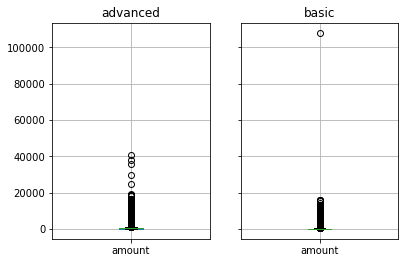

In [15]:
df[['product', 'amount']].groupby(by='product').boxplot()

advanced         AxesSubplot(0.1,0.15;0.363636x0.75)
basic       AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

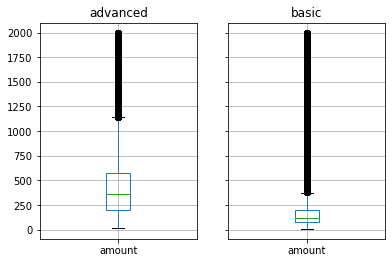

In [20]:
df[['product', 'amount']][df[['product', 'amount']]['amount'] < 2000].groupby(by='product').boxplot()

In [258]:
df[['product', 'amount', 'transactions']][df[['product', 'amount']]['amount'] < 1300].groupby(by='product').describe()

amount                                                             \
             count        mean         std   min    25%    50%    75%     max   
product                                                                         
advanced  272780.0  403.531978  262.474337  20.0  200.0  349.0  559.0  1299.0   
basic     986538.0  155.607187  128.394356   8.0   80.0  120.0  199.0  1299.0   

         transactions                                                
                count      mean       std  min  25%  50%  75%   max  
product                                                              
advanced     272780.0  1.136777  0.522326  1.0  1.0  1.0  1.0  16.0  
basic        986538.0  1.247426  0.851616  1.0  1.0  1.0  1.0  37.0

In [260]:
df[['product', 'amount']][df[['product', 'amount']]['amount'] > 1300].groupby(by='product').count() / df[['product', 'amount']].groupby(by='product').count()

,amount
product,
advanced,0.051477
basic,0.003910


#### Вывод: видим, что процент выбросов в случае advanced чуть больше 5%, а в случае basic около 0.3%

# В качестве метрик возьмём:
- средний чек, 
- количество транзакций, 
- количество уникальных пользователей в день, 
- 90ый перцентиль по чекам и конверсиям.

## Посмотрим на тенденцию среднего чека и покажем, что можно обойтись без использования 90го перцентиля, потому что средний чек и конверсия из-за выбросов не сильно искажает картину.

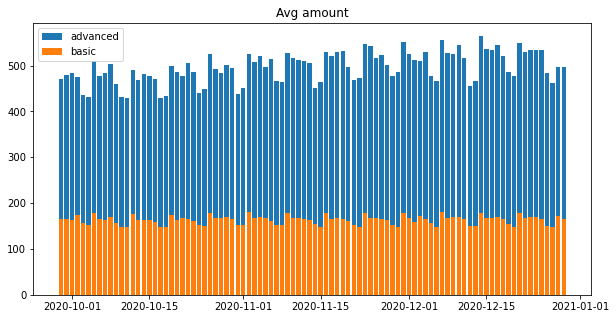

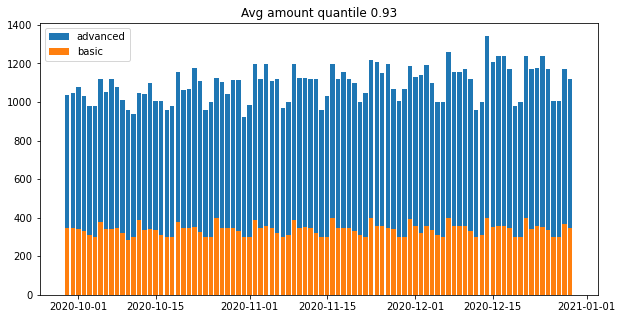

In [261]:
mean_data = df[['event_date', 'product', 'amount']].groupby(by=['event_date', 'product']).mean().reset_index()
plt.figure(figsize=(10, 5))
plt.bar(mean_data[(mean_data['product'] == 'advanced')]['event_date'], mean_data[(mean_data['product'] == 'advanced')]['amount'], label='advanced')
plt.bar(mean_data[(mean_data['product'] == 'basic')]['event_date'], mean_data[(mean_data['product'] == 'basic')]['amount'], label='basic')
plt.title('Avg amount')
plt.legend()
plt.show()
mean_data = df[['event_date', 'product', 'amount']].groupby(by=['event_date', 'product']).quantile(0.93).reset_index()
plt.figure(figsize=(10, 5))
plt.bar(mean_data[(mean_data['product'] == 'advanced')]['event_date'], mean_data[(mean_data['product'] == 'advanced')]['amount'], label='advanced')
plt.bar(mean_data[(mean_data['product'] == 'basic')]['event_date'], mean_data[(mean_data['product'] == 'basic')]['amount'], label='basic')
plt.title('Avg amount quantile 0.93')
plt.legend()
plt.show()

## Как мы видим картина достаточно похожа, что при использовании среднего чека, что при использовании quantile(0.93)

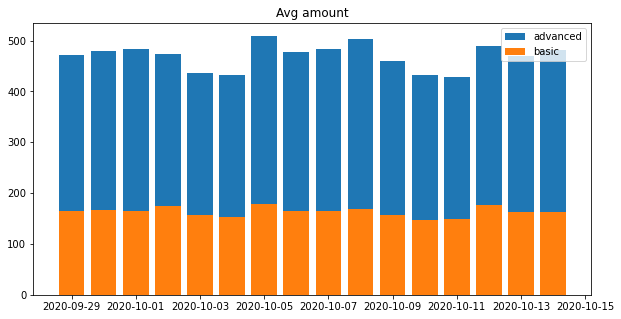

In [89]:
mean_data = df[['event_date', 'product', 'amount']].groupby(by=['event_date', 'product']).mean().reset_index()
plt.figure(figsize=(10, 5))
plt.bar(mean_data[(mean_data['product'] == 'advanced') & (mean_data['event_date'] <= '2020-10-14')]['event_date'], mean_data[(mean_data['product'] == 'advanced') & (mean_data['event_date'] <= '2020-10-14')]['amount'], label='advanced')
plt.bar(mean_data[(mean_data['product'] == 'basic') & (mean_data['event_date'] <= '2020-10-14')]['event_date'], mean_data[(mean_data['product'] == 'basic') & (mean_data['event_date'] <= '2020-10-14')]['amount'], label='basic')
plt.title('Avg amount')
plt.legend()
plt.show()

#### Пользователи имеют больший средний чек в первой половине недели, а во второй средний чек уменьшается

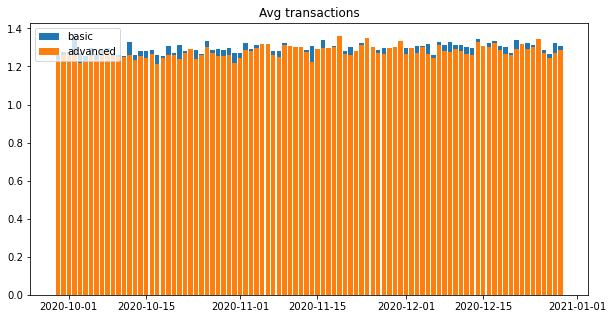

In [264]:
mean_data = df[['event_date', 'product', 'transactions']].groupby(by=['event_date', 'product']).mean().reset_index()
plt.figure(figsize=(10, 5))
plt.bar(mean_data[(mean_data['product'] == 'basic')]['event_date'], mean_data[(mean_data['product'] == 'basic') ]['transactions'], label='basic')
plt.bar(mean_data[(mean_data['product'] == 'advanced')]['event_date'], mean_data[(mean_data['product'] == 'advanced') ]['transactions'], label='advanced')
plt.title('Avg transactions')
plt.legend()
plt.show()

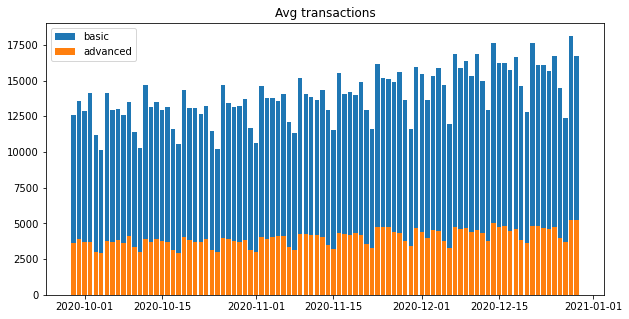

In [265]:
mean_data = df[['event_date', 'product', 'transactions']].groupby(by=['event_date', 'product']).sum().reset_index()
plt.figure(figsize=(10, 5))
plt.bar(mean_data[(mean_data['product'] == 'basic')]['event_date'], mean_data[(mean_data['product'] == 'basic') ]['transactions'], label='basic')
plt.bar(mean_data[(mean_data['product'] == 'advanced')]['event_date'], mean_data[(mean_data['product'] == 'advanced') ]['transactions'], label='advanced')
plt.title('Avg transactions')
plt.legend()
plt.show()

## Видим, что среднее количество транзакций примерно одинаково для двух продуктов, а вот сумма для базового значительно больше, чем для продвинутого, т.к. пользователи базового каждый день покупают чаще, чем продвинутого продукта. 

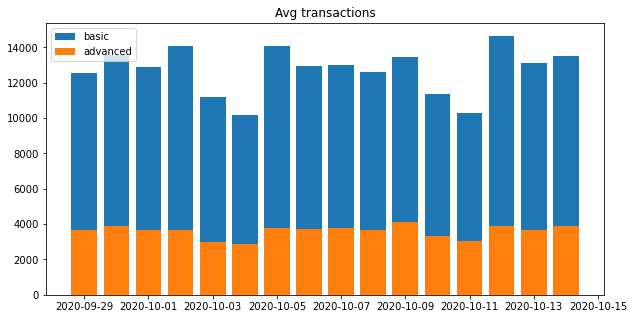

In [99]:
mean_data = df[['event_date', 'product', 'transactions']].groupby(by=['event_date', 'product']).sum().reset_index()
plt.figure(figsize=(10, 5))
plt.bar(mean_data[(mean_data['product'] == 'basic') & (mean_data['event_date'] <= '2020-10-14')]['event_date'], mean_data[(mean_data['product'] == 'basic') & (mean_data['event_date'] <= '2020-10-14')]['transactions'], label='basic')
plt.bar(mean_data[(mean_data['product'] == 'advanced') & (mean_data['event_date'] <= '2020-10-14')]['event_date'], mean_data[(mean_data['product'] == 'advanced') & (mean_data['event_date'] <= '2020-10-14')]['transactions'], label='advanced')
plt.title('Avg transactions')
plt.legend()
plt.show()

### Видим ту же тенденцию (сезонность), что и в случае со средним чеком, т.е. транзакций больше в будни дни, а в выходные резко падает.

### Построим распределение метрик

# средний чек

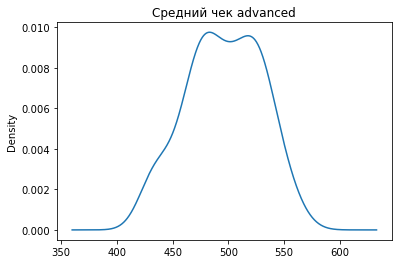

Advanced avg amount mean = 495.85123919003286, std = 33.409616136817284


In [284]:
mean_df = df[['event_date', 'product', 'amount']].groupby(by=['event_date', 'product']).mean().reset_index('product')
advanced_mean = mean_df[mean_df['product'] == 'advanced']['amount']
advanced_mean.plot.kde()
plt.title('Средний чек advanced')
plt.show()
print(f'Advanced avg amount mean = {advanced_mean.mean()}, std = {advanced_mean.std()}')

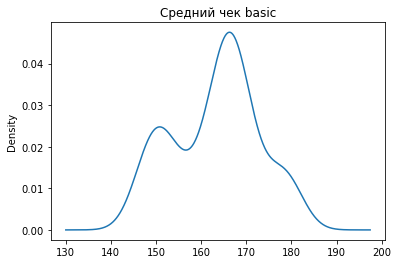

Advanced avg amount mean = 163.27360494233378, std = 9.375112780788374


In [286]:
mean_df = df[['event_date', 'product', 'amount']].groupby(by=['event_date', 'product']).mean().reset_index('product')
basic_mean = mean_df[mean_df['product'] == 'basic']['amount']
basic_mean.plot.kde()
plt.title('Средний чек basic')
plt.show()
print(f'Advanced avg amount mean = {basic_mean.mean()}, std = {basic_mean.std()}')

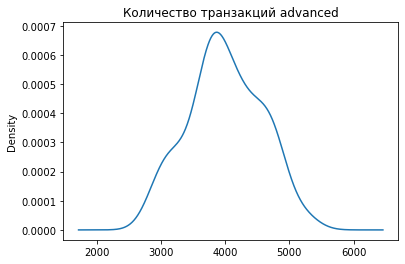

Advanced sum transactions mean = 3998.532608695652, std = 563.7573995242942


In [294]:
mean_df = df[['event_date', 'product', 'transactions']].groupby(by=['event_date', 'product']).sum().reset_index('product')
advanced_mean = mean_df[mean_df['product'] == 'advanced']['transactions']
advanced_mean.plot.kde()
plt.title('Количество транзакций advanced')
plt.show()
print(f'Advanced sum transactions mean = {advanced_mean.mean()}, std = {advanced_mean.std()}')

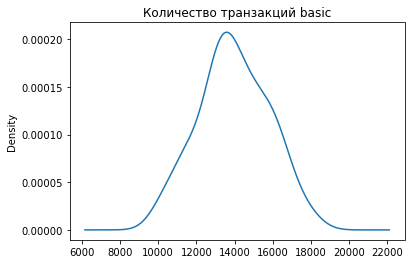

Advanced sum transactions mean = 13961.228260869566, std = 1818.7450697233785


In [295]:
mean_df = df[['event_date', 'product', 'transactions']].groupby(by=['event_date', 'product']).sum().reset_index('product')
basic_mean = mean_df[mean_df['product'] == 'basic']['transactions']
basic_mean.plot.kde()
plt.title('Количество транзакций basic')
plt.show()
print(f'Advanced sum transactions mean = {basic_mean.mean()}, std = {basic_mean.std()}')

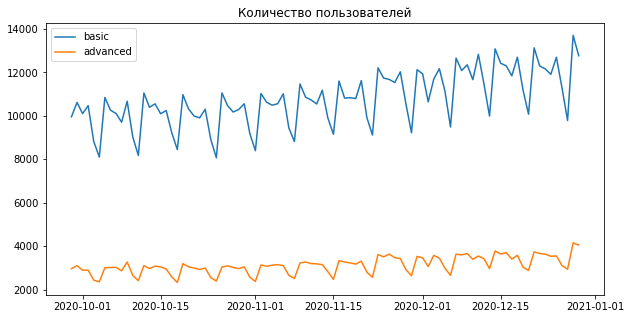

In [288]:
df2 = df[['event_date', 'user_id', 'product']].groupby(by=['event_date', 'product']).agg({'user_id': pd.Series.nunique}).reset_index()
plt.figure(figsize=(10, 5))
plt.plot(df2[df2['product'] == 'basic'][['event_date', 'user_id']]['event_date'], df2[df2['product'] == 'basic'][['event_date', 'user_id']]['user_id'], label='basic')
plt.plot(df2[df2['product'] == 'advanced'][['event_date', 'user_id']]['event_date'], df2[df2['product'] == 'advanced'][['event_date', 'user_id']]['user_id'], label='advanced')
plt.title('Количество пользователей')
plt.legend()
plt.show()

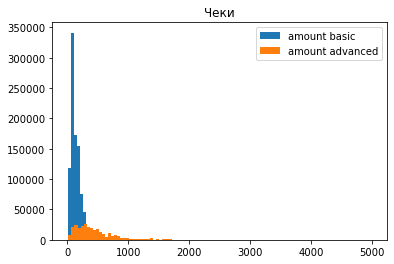

In [296]:
df_avg_amount = df[['product', 'amount', 'transactions']][df[['product', 'amount']]['amount'] < 5000]
plt.hist(df_avg_amount[df_avg_amount['product'] =='basic']['amount'], bins=100, label='amount basic')
plt.hist(df_avg_amount[df_avg_amount['product'] =='advanced']['amount'], bins=100, label='amount advanced')
plt.title('Чеки')
plt.legend()
plt.show()

### Видим, что пользователей с basic в разы больше, чем с advanced, но их чеки меньше в среднем

#### Ожидается увеличение метрик (статистик): средний чек у advanced, количество transactions у advanced,  количество пользователей продуктов у advanced, средний чек у basic. Ожидается падение: количества пользователей у basic (они перетекут в advanced), количество transactions. Нужно ещё внимательно следить за общим количеством пользователей, а то они могут начать утекать с нашего бизнеса. 

### Посмотрим, как сами по себе меняются в квартале метрики и сделаем выводы, как может наш эксперимент повлияеть на них

In [299]:
df[['event_date', 'product', 'amount']][(df[['event_date', 'product', 'amount']]['event_date'] >= '2020-12-01') & (df[['event_date', 'product', 'amount']]['event_date'] < '2021-01-01')].groupby(by='product').mean()['amount'] / df[['event_date', 'product', 'amount']][(df[['event_date', 'product', 'amount']]['event_date'] >= '2020-10-01') & (df[['event_date', 'product', 'amount']]['event_date'] < '2020-11-01')].groupby(by='product').mean()['amount']

product
advanced    1.086322
basic       1.011763
Name: amount, dtype: float64

#### Средний чек вырастает в среднем каждый месяц на 3.5% у advanced и на 0.5% у basic. В случае нашего эксперимента, предположим изменения среднего чека у advanced на 10%, а у basic на 3%. 

In [304]:
df[['event_date', 'product', 'transactions']][(df[['event_date', 'product', 'transactions']]['event_date'] >= '2020-12-01') & (df[['event_date', 'product', 'transactions']]['event_date'] < '2021-01-01')].groupby(by='product').sum()['transactions'] / df[['event_date', 'product', 'transactions']][(df[['event_date', 'product', 'transactions']]['event_date'] >= '2020-11-01') & (df[['event_date', 'product', 'transactions']]['event_date'] < '2020-12-01')].groupby(by='product').sum()['transactions']

product
advanced    1.069126
basic       1.084946
Name: transactions, dtype: float64

#### Количество транзакций в день растатёт в среднем каждый месяц  у advanced на 7.25%, у basic на 7%. Значит после нашего эксперимента количество транзакций у advanced должно вырасти примерно на 15%, а у basic не увеличиться, даже начать падать.

In [307]:
df2

,event_date,product,user_id
0,2020-09-29,advanced,2967
1,2020-09-29,basic,9953
2,2020-09-30,advanced,3106
3,2020-09-30,basic,10616
4,2020-10-01,advanced,2896
...,...,...,...
179,2020-12-27,basic,9784
180,2020-12-28,advanced,4153
181,2020-12-28,basic,13702
182,2020-12-29,advanced,4052


In [310]:
advanced_user = df2[df2['product'] == 'advanced']
basic_user = df2[df2['product'] == 'basic']
print(f"advanced = {advanced_user[(advanced_user['event_date'] >= '2020-12-01') & (advanced_user['event_date'] < '2021-01-01')]['user_id'].sum() / advanced_user[(advanced_user['event_date'] >= '2020-10-01') & (advanced_user['event_date'] < '2020-11-01')]['user_id'].sum()}, basic = {basic_user[(basic_user['event_date'] >= '2020-12-01') & (basic_user['event_date'] < '2021-01-01')]['user_id'].sum() / basic_user[(basic_user['event_date'] >= '2020-10-01') & (basic_user['event_date'] < '2020-11-01')]['user_id'].sum()}")

advanced = 1.1242795389048992, basic = 1.1205221823070122


#### Видим, что количество пользователей растёт в среднем на 6% в месяц для advanced и basic. Наш эксперимент должен увеличить количество пользователей для advanced на 15%, а в basic либо не изменить, либо уменьшить.

## MDE

### средний чек

In [344]:
def choose_date(data, share): 
    tmp = data.groupby(['user_id']).sum().reset_index()
    x = tmp[(tmp.user_id)%int(1/share)==1].reset_index()
    return x


x1 = choose_date(df[df['product'] == 'basic'], 0.3) #получаем необходимую подвыборку для avg amount basic

mean = x1.amount.mean()
std = x1.amount.std()
 
alpha = 0.01
power = 0.8
result_effect = 0.03 # целевой размер относительного отклоенения исходной метрики
effect_size = (mean / std) * result_effect
print(f'MDE avg amount basic = {effect_size}')

MDE avg amount basic = 0.005980537485433243


In [353]:
def choose_date(data, share): 
    tmp = data.groupby(['user_id']).sum().reset_index()
    x = tmp[(tmp.user_id)%int(1/share)==1].reset_index()
    return x


x1 = choose_date(df[df['product'] == 'advanced'], 0.5) #получаем необходимую подвыборку для avg amount advanced

mean = x1.amount.mean()
std = x1.amount.std()
 
alpha = 0.01
power = 0.8
result_effect = 0.1 # целевой размер относительного отклоенения исходной метрики
effect_size = (mean / std) * result_effect
print(f'MDE avg amount advanced = {effect_size}')

MDE avg amount advanced = 0.018689277989086237


### количество транзакций

In [333]:
def choose_date(data, share): 
    tmp = data.groupby(['user_id']).sum().reset_index()
    x = tmp[(tmp.user_id)%int(1/share) == 1]
    return x


x1 = choose_date(df[df['product'] == 'advanced'], 0.5) #получаем необходимую подвыборку для avg amount advanced

mean = x1.transactions.mean()
std = x1.transactions.std()
 
alpha = 0.01
power = 0.8
result_effect = 0.15 # целевой размер относительного отклоенения исходной метрики
effect_size = (mean / std) * result_effect
print(f'MDE sum transactions advanced = {effect_size}')

MDE sum transactions advanced = 0.03224063033421147
